44100
(4153280,)
[ -186 -3043 -5140 ...     0     0     0]


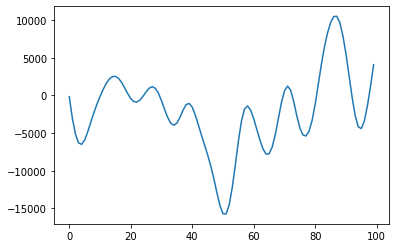

In [13]:
from IPython.display import Audio
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display

wav_path = "../mydataset/wav_files/track1.wav"
sr, data = wavfile.read(wav_path)
print(sr)
print(data.shape)
print(data[2000000:20000010])
plt.plot(data[2000000:2000100])

(2076640,)
(192, 4056)
(128, 4056)
(1025, 4056)
(2076640,)


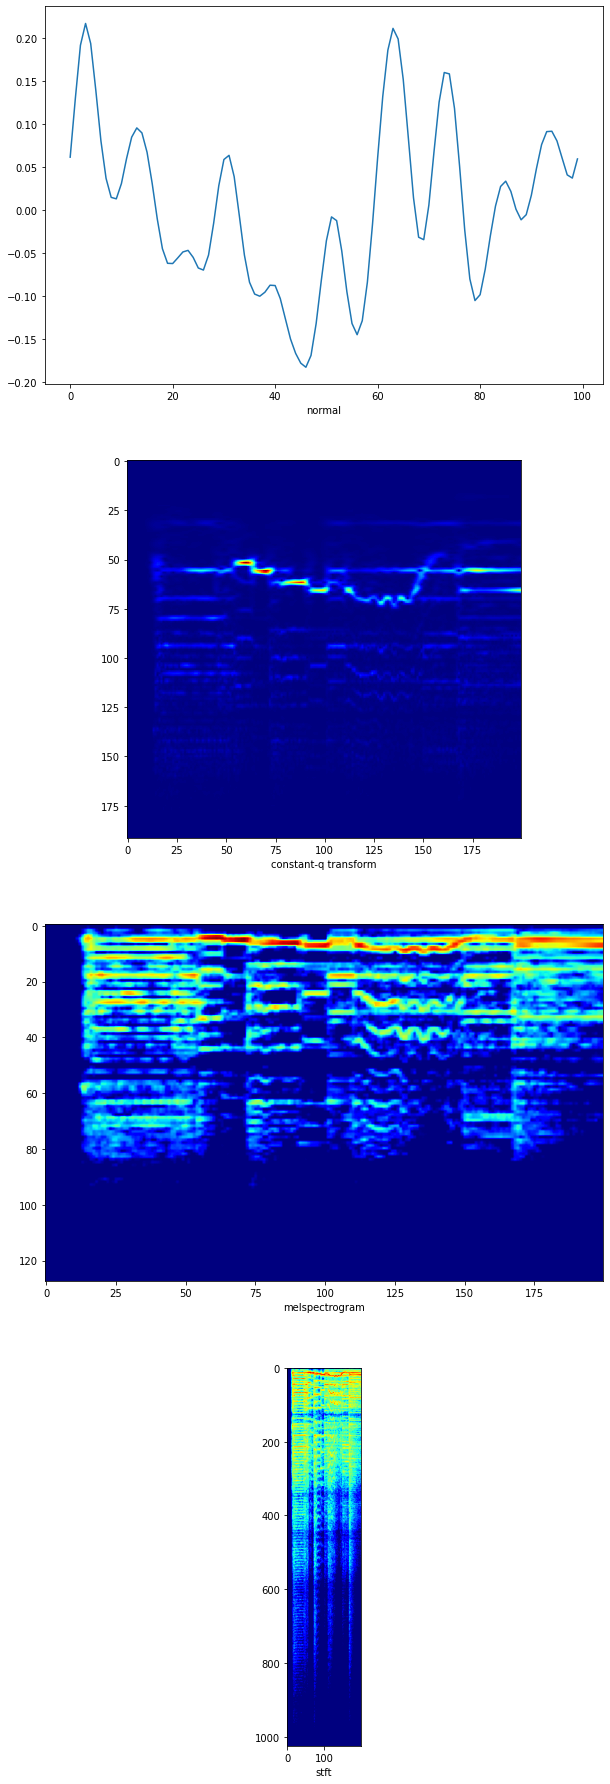

In [28]:
from IPython.display import Audio
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display

wav_path = "../mydataset/wav_files/track1.wav"
sr, data = wavfile.read(wav_path)
current_sr = sr

normalize = True
downsample = True
sr_downs = 22050

mode1 = "c"
mode2 = "m"
mode3 = "s"
hop_length = 512
cqt_bins = 192
cqt_octaves = 24
n_fft = 2048
data = data.astype(np.float32)
if normalize:
    data = librosa.util.normalize(data)
if downsample:
    data = librosa.resample(data, sr, sr_downs)
    current_sr = sr_downs
print(data.shape)
if mode1 == "c":
    data1 = np.abs(librosa.cqt(data,
        hop_length=512, 
        sr=sr_downs, 
        n_bins=192, 
        bins_per_octave=24))
    print(data1.shape)
if mode2 == "m":
    data2 = librosa.feature.melspectrogram(data, sr=current_sr, n_fft=n_fft, hop_length=hop_length)
    print(data2.shape)
if mode3 == "s":
    data3 = librosa.stft(data, n_fft=n_fft, hop_length=hop_length)
    data3 = np.abs(data3)
    print(data3.shape)
print(data.shape)
fig = plt.figure(figsize=(10, 32))
ax1 = fig.add_subplot(4,1,1)
ax2 = fig.add_subplot(4,1,2)
ax3 = fig.add_subplot(4,1,3)
ax4 = fig.add_subplot(4,1,4)

ax1.set_xlabel("normal")
ax2.set_xlabel("constant-q transform")
ax3.set_xlabel("melspectrogram")
ax4.set_xlabel("stft")

ax1.plot(data[2000000:2000100])
ax2.imshow(data1[:,:200], cmap="jet")
ax3.imshow(librosa.amplitude_to_db(data2[:,:200], ref=np.max), cmap="jet")
ax4.imshow(librosa.amplitude_to_db(data3[:,:200], ref=np.max), cmap="jet")
# plt.plot(data[2000000:2000100])
